Agrupamento (Clustering)

Análise de partidas ranqueadas (elo Diamante) de League of Legends até os primeiros 10 minutos, utilizando K-Means para encontrar padrões de desempenho entre as equipes azul e vermelha.

Importação de bibliotecas

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Configurações estéticas

In [18]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,6)

Carregamento e inspeção dos dados

In [19]:
df = pd.read_csv('../../datasets/high_diamond_ranked_10min.csv')

print("Visualização inicial do dataset:")
display(df.head())

Visualização inicial do dataset:


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [20]:
print("\nInformações do dataset:")
print(df.info())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 no

Pré-processamento dos dados

In [21]:
if "gameId" in df.columns:
    df = df.drop(columns=["gameId"])

if "blueWins" in df.columns:
    target = df["blueWins"]
    df = df.drop(columns=["blueWins"])
else:
    target = None

print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds                      0
redTowersDestroyed

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print("\nDados normalizados. Formato:", scaled_data.shape)


Dados normalizados. Formato: (9879, 38)


Determinação do número ideal de clusters (Método do Cotovelo)

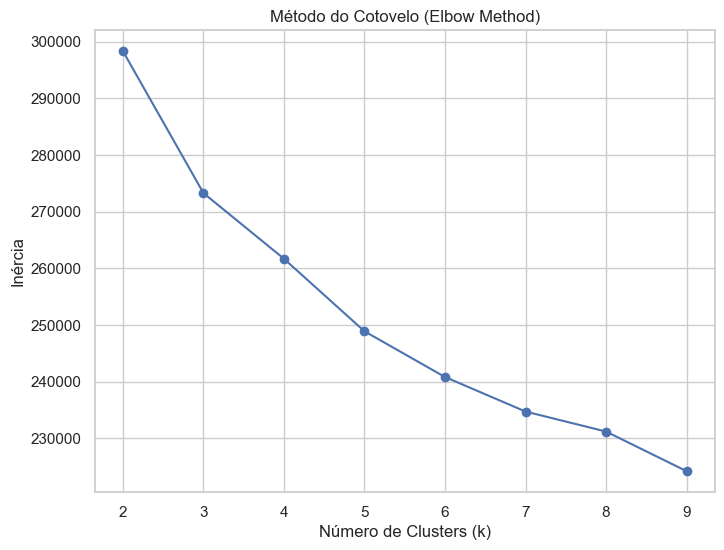

Escolha o valor de k com base no ponto onde a curva começa a estabilizar.


In [23]:
inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'o-')
plt.title("Método do Cotovelo (Elbow Method)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.show()

print("Escolha o valor de k com base no ponto onde a curva começa a estabilizar.")

Aplicação do K-Means

In [24]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df["Cluster"] = clusters

print("\nDistribuição dos clusters:")
print(df["Cluster"].value_counts())


Distribuição dos clusters:
Cluster
2    4189
0    3011
1    2679
Name: count, dtype: int64


Visualização dos clusters (PCA)

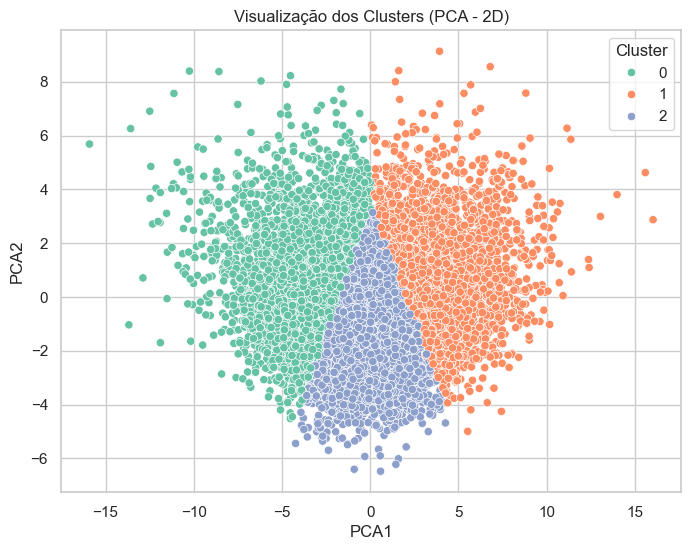

In [25]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df["PCA1"], df["PCA2"] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Visualização dos Clusters (PCA - 2D)")
plt.show()

Avaliação do agrupamento

In [26]:
silhouette = silhouette_score(scaled_data, clusters)
print(f"Índice de Silhueta: {silhouette:.3f}")

Índice de Silhueta: 0.114


Interpretação dos clusters

In [27]:
cluster_summary = df.groupby("Cluster").mean()
print("\nResumo estatístico por cluster:")
display(cluster_summary)


Resumo estatístico por cluster:


,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,,,,,
0,22.518765,2.965128,0.733975,9.204251,4.869479,10.062438,0.797409,0.529724,0.267685,0.132182,...,6.682431,16923.210561,202.105613,47.984058,-2647.148456,-1919.401528,20.210561,1549.410960,-3.864383,0.880800
1,21.486376,2.525569,0.287421,4.816349,9.283315,5.076521,0.297872,0.192236,0.105636,0.012318,...,7.149160,18924.936917,223.922359,52.649496,2788.760358,2118.530795,22.392236,1820.571855,4.092656,1.018270
2,22.635474,2.915493,0.479112,4.887563,5.037479,5.191931,0.533302,0.349964,0.183337,0.018381,...,6.956744,18092.203867,224.102411,52.851277,85.241824,104.060396,22.410241,1610.631559,0.160284,-1.284325


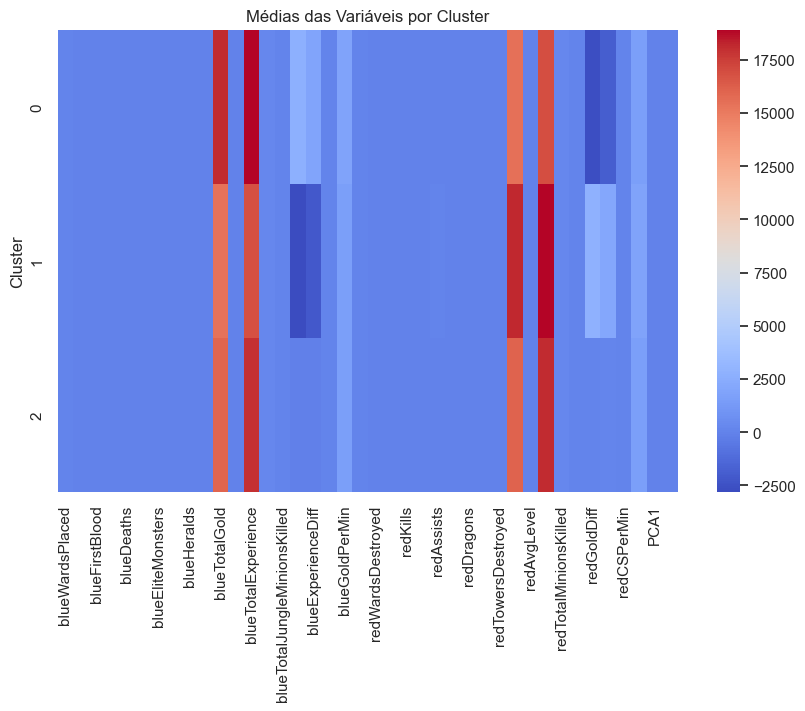

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, cmap="coolwarm", annot=False)
plt.title("Médias das Variáveis por Cluster")
plt.show()